In [7]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from mlfinlab.multi_product.etf_trick import get_futures_roll_series
from mlfinlab.data_structures import time_data_structures
# Get processed tick data csv from url
tick_data_url = "https://raw.githubusercontent.com/jjakimoto/finance_ml/master/datasets/Google.csv"

google_df = pd.read_csv(tick_data_url, parse_dates=['Date'], index_col='Date')  
len(google_df)


3125

In [9]:
google_df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [10]:
google_df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-10,827.07,829.41,823.1400,826.01,1141799.0,0.0,1.0,827.07,829.41,823.1400,826.01,1141799.0
2017-01-11,826.62,829.90,821.4700,829.86,1261666.0,0.0,1.0,826.62,829.90,821.4700,829.86,1261666.0
2017-01-12,828.38,830.38,821.0100,829.53,1348274.0,0.0,1.0,828.38,830.38,821.0100,829.53,1348274.0
2017-01-13,831.00,834.65,829.5200,830.94,1255255.0,0.0,1.0,831.00,834.65,829.5200,830.94,1255255.0
2017-01-17,830.00,830.18,823.2001,827.20,1242810.0,0.0,1.0,830.00,830.18,823.2001,827.20,1242810.0


In [18]:
# Summarize Ex-Dividend and Split Ratio fields
print("=== EX-DIVIDEND FIELD SUMMARY ===")
print(f"Total records: {len(google_df)}")
print(f"Ex-Dividend field statistics:")
print(f"  Non-zero ex-dividend events: {(google_df['Ex-Dividend'] != 0).sum()}")
print(f"  Zero ex-dividend records: {(google_df['Ex-Dividend'] == 0).sum()}")
print(f"  Missing/NaN values: {google_df['Ex-Dividend'].isna().sum()}")
print(f"  Ex-dividend rate range: {google_df['Ex-Dividend'].min():.4f} to {google_df['Ex-Dividend'].max():.4f}")
print(f"  Mean ex-dividend (when > 0): {google_df[google_df['Ex-Dividend'] > 0]['Ex-Dividend'].mean():.4f}")

print("\n=== SPLIT RATIO FIELD SUMMARY ===")
print(f"Split Ratio field statistics:")
print(f"  Non-unity split events: {(google_df['Split Ratio'] != 1.0).sum()}")
print(f"  Unity split records: {(google_df['Split Ratio'] == 1.0).sum()}")
print(f"  Missing/NaN values: {google_df['Split Ratio'].isna().sum()}")
print(f"  Split ratio range: {google_df['Split Ratio'].min():.4f} to {google_df['Split Ratio'].max():.4f}")

# Show actual ex-dividend events
ex_div_events = google_df[google_df['Ex-Dividend'] > 0]
if len(ex_div_events) > 0:
    print(f"\n=== ACTUAL EX-DIVIDEND EVENTS ===")
    print(f"Number of dividend events: {len(ex_div_events)}")
    print("Ex-dividend dates and amounts:")
    for date, row in ex_div_events.iterrows():
        print(f"  {date.strftime('%Y-%m-%d')}: ${row['Ex-Dividend']:.4f}")

# Show actual split events
split_events = google_df[google_df['Split Ratio'] != 1.0]
if len(split_events) > 0:
    print(f"\n=== ACTUAL SPLIT EVENTS ===")
    print(f"Number of split events: {len(split_events)}")
    print("Split dates and ratios:")
    for date, row in split_events.iterrows():
        print(f"  {date.strftime('%Y-%m-%d')}: {row['Split Ratio']:.4f}")
else:
    print(f"\n=== NO SPLIT EVENTS FOUND ===")

# Show value counts for both fields
print(f"\n=== EX-DIVIDEND VALUE COUNTS (Top 10) ===")
print(google_df['Ex-Dividend'].value_counts().head(10))

print(f"\n=== SPLIT RATIO VALUE COUNTS ===")
print(google_df['Split Ratio'].value_counts())

=== EX-DIVIDEND FIELD SUMMARY ===
Total records: 3125
Ex-Dividend field statistics:
  Non-zero ex-dividend events: 1
  Zero ex-dividend records: 3124
  Missing/NaN values: 0
  Ex-dividend rate range: 0.0000 to 567.9717
  Mean ex-dividend (when > 0): 567.9717

=== SPLIT RATIO FIELD SUMMARY ===
Split Ratio field statistics:
  Non-unity split events: 0
  Unity split records: 3125
  Missing/NaN values: 0
  Split ratio range: 1.0000 to 1.0000

=== ACTUAL EX-DIVIDEND EVENTS ===
Number of dividend events: 1
Ex-dividend dates and amounts:
  2014-04-03: $567.9717

=== NO SPLIT EVENTS FOUND ===

=== EX-DIVIDEND VALUE COUNTS (Top 10) ===
Ex-Dividend
0.000000      3124
567.971668       1
Name: count, dtype: int64

=== SPLIT RATIO VALUE COUNTS ===
Split Ratio
1.0    3125
Name: count, dtype: int64


In [14]:
from mlfinlab.data_structures import standard_data_structures

# First, we need to convert your OHLC data to tick-like format
# Create a tick data format from OHLC data using typical price and volume
google_tick_data = []

for index, row in google_df.iterrows():
    # Use typical price (HLC/3) as the price
    typical_price = row['Close']
    
    # Create tick entry with timestamp, price, and volume
    google_tick_data.append([index, typical_price, row['Volume']])

# Convert to DataFrame with required columns for MLFinLab
tick_df = pd.DataFrame(google_tick_data, columns=['date_time', 'price', 'volume'])
tick_df['date_time'] = pd.to_datetime(tick_df['date_time'])

# Set the dollar threshold - you may need to adjust this based on your data
# A common approach is to use average daily dollar volume divided by desired number of bars per day
avg_daily_dollar_volume = (google_df['Close'] * google_df['Volume']).mean()
dollar_threshold = avg_daily_dollar_volume / 10  # Adjust divisor as needed

# Create dollar bars
dollar_bars = standard_data_structures.get_dollar_bars(
    tick_df, 
    threshold=dollar_threshold
)

print(f"Original daily bars: {len(google_df)}")
print(f"Average daily dollar volume: ${avg_daily_dollar_volume:,.2f}")
print(f"Dollar bars created: {len(dollar_bars)}")
print(f"Dollar threshold used: ${dollar_threshold:,.2f}")

Reading data in batches:
Batch number: 0
Returning bars 

Original daily bars: 3125
Average daily dollar volume: $3,814,391,922.45
Dollar bars created: 3125
Dollar threshold used: $381,439,192.25


=== SERIAL CORRELATION ANALYSIS ===
Dollar Bars Close Serial Correlation (lag-1): 0.025182
P-value: 0.159442
Statistical significance (α=0.05): No

=== COMPARISON WITH DAILY BARS ===
Daily Bars Close Serial Correlation (lag-1): 0.025182
P-value: 0.159442
Statistical significance (α=0.05): No


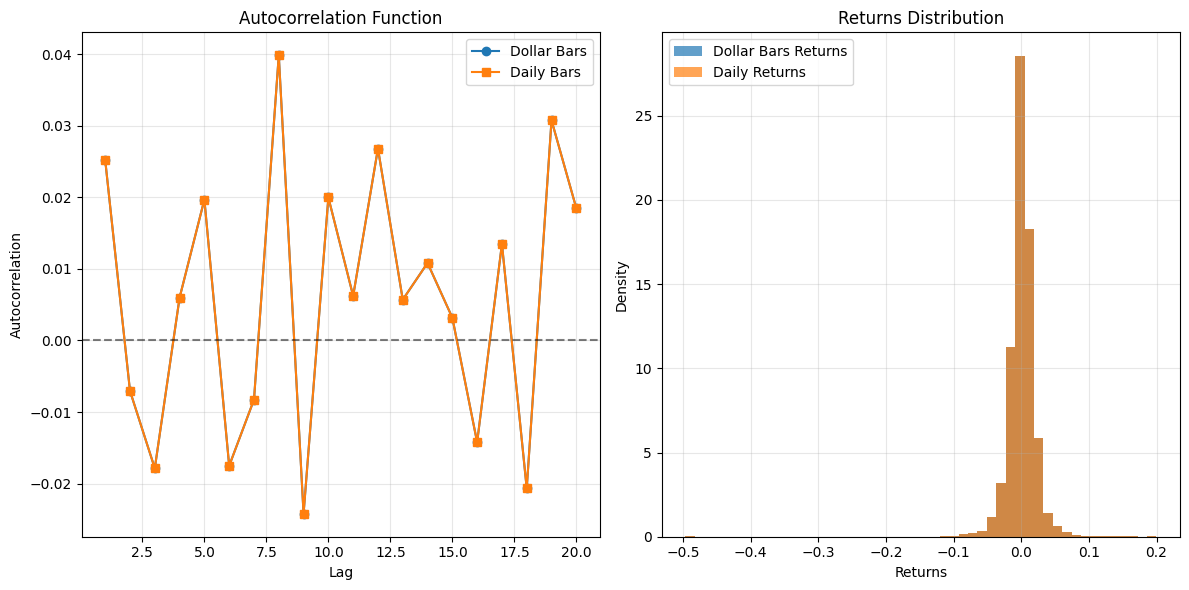


=== SUMMARY STATISTICS ===
Dollar bars returns - Mean: 0.000929, Std: 0.021663
Daily returns - Mean: 0.000929, Std: 0.021663


In [15]:
# Calculate serial correlation for dollar bars close prices
from scipy.stats import pearsonr

# Calculate returns for dollar bars
dollar_bars_returns = dollar_bars['close'].pct_change().dropna()

# Calculate serial correlation (lag-1 autocorrelation)
serial_corr, p_value = pearsonr(dollar_bars_returns[:-1], dollar_bars_returns[1:])

print(f"=== SERIAL CORRELATION ANALYSIS ===")
print(f"Dollar Bars Close Serial Correlation (lag-1): {serial_corr:.6f}")
print(f"P-value: {p_value:.6f}")
print(f"Statistical significance (α=0.05): {'Yes' if p_value < 0.05 else 'No'}")

# For comparison, calculate serial correlation for daily bars
daily_returns = google_df['Close'].pct_change().dropna()
daily_serial_corr, daily_p_value = pearsonr(daily_returns[:-1], daily_returns[1:])

print(f"\n=== COMPARISON WITH DAILY BARS ===")
print(f"Daily Bars Close Serial Correlation (lag-1): {daily_serial_corr:.6f}")
print(f"P-value: {daily_p_value:.6f}")
print(f"Statistical significance (α=0.05): {'Yes' if daily_p_value < 0.05 else 'No'}")

# Calculate multiple lags for more comprehensive analysis
max_lags = min(20, len(dollar_bars_returns)//10)
dollar_autocorrs = []
daily_autocorrs = []

for lag in range(1, max_lags + 1):
    # Dollar bars autocorrelation
    dollar_corr, _ = pearsonr(dollar_bars_returns[:-lag], dollar_bars_returns[lag:])
    dollar_autocorrs.append(dollar_corr)
    
    # Daily bars autocorrelation
    daily_corr, _ = pearsonr(daily_returns[:-lag], daily_returns[lag:])
    daily_autocorrs.append(daily_corr)

# Plot autocorrelation function
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_lags + 1), dollar_autocorrs, 'o-', label='Dollar Bars')
plt.plot(range(1, max_lags + 1), daily_autocorrs, 's-', label='Daily Bars')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot returns distribution
plt.subplot(1, 2, 2)
plt.hist(dollar_bars_returns, bins=50, alpha=0.7, label='Dollar Bars Returns', density=True)
plt.hist(daily_returns, bins=50, alpha=0.7, label='Daily Returns', density=True)
plt.xlabel('Returns')
plt.ylabel('Density')
plt.title('Returns Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== SUMMARY STATISTICS ===")
print(f"Dollar bars returns - Mean: {dollar_bars_returns.mean():.6f}, Std: {dollar_bars_returns.std():.6f}")
print(f"Daily returns - Mean: {daily_returns.mean():.6f}, Std: {daily_returns.std():.6f}")

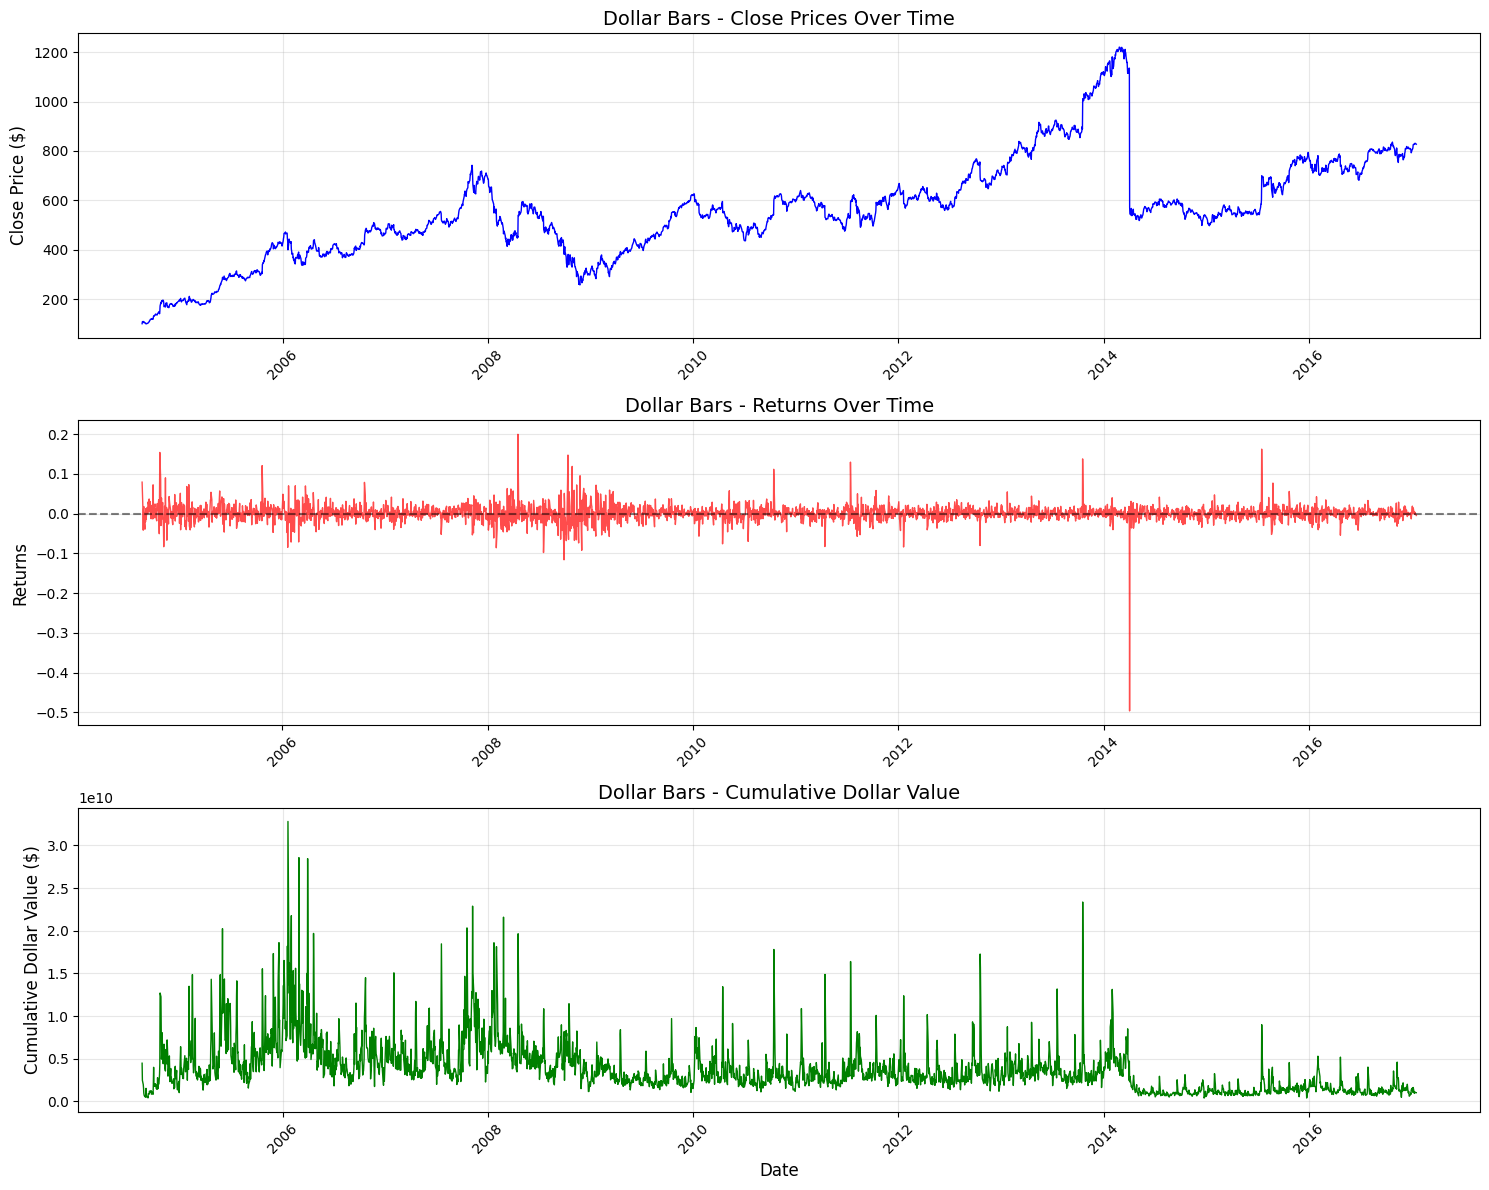

=== DOLLAR BARS STATISTICS ===
Close Price - Min: $100.01, Max: $1220.17, Mean: $559.91
Returns - Min: -0.496520, Max: 0.199915, Mean: 0.000929
Returns Std Dev: 0.021663
Final Cumulative Dollar Value: $1,028,052,432.00
Total Dollar Bars: 3125
Date Range: 2004-08-19 00:00:00 to 2017-01-17 00:00:00


In [17]:
# Create three separate charts for dollar bars analysis
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Calculate returns for dollar bars
dollar_bars_returns = dollar_bars['close'].pct_change().dropna()

# Plot 1: Dollar Bars Close Price
axes[0].plot(dollar_bars.index, dollar_bars['close'], color='blue', linewidth=1)
axes[0].set_title('Dollar Bars - Close Prices Over Time', fontsize=14)
axes[0].set_ylabel('Close Price ($)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Dollar Bars Returns
axes[1].plot(dollar_bars_returns.index, dollar_bars_returns, color='red', linewidth=1, alpha=0.7)
axes[1].set_title('Dollar Bars - Returns Over Time', fontsize=14)
axes[1].set_ylabel('Returns', fontsize=12)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Cumulative Dollar Value
axes[2].plot(dollar_bars.index, dollar_bars['cum_dollar_value'], color='green', linewidth=1)
axes[2].set_title('Dollar Bars - Cumulative Dollar Value', fontsize=14)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Cumulative Dollar Value ($)', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics for each series
print(f"=== DOLLAR BARS STATISTICS ===")
print(f"Close Price - Min: ${dollar_bars['close'].min():.2f}, Max: ${dollar_bars['close'].max():.2f}, Mean: ${dollar_bars['close'].mean():.2f}")
print(f"Returns - Min: {dollar_bars_returns.min():.6f}, Max: {dollar_bars_returns.max():.6f}, Mean: {dollar_bars_returns.mean():.6f}")
print(f"Returns Std Dev: {dollar_bars_returns.std():.6f}")
print(f"Final Cumulative Dollar Value: ${dollar_bars['cum_dollar_value'].iloc[-1]:,.2f}")
print(f"Total Dollar Bars: {len(dollar_bars)}")
print(f"Date Range: {dollar_bars.index.min()} to {dollar_bars.index.max()}")

In [19]:
# Option 1: Adjust prices for ex-dividend events before creating dollar bars
from mlfinlab.data_structures import standard_data_structures

# Create adjusted tick data that accounts for ex-dividend events
google_tick_data_adjusted = []

# Calculate cumulative dividend adjustment factor
cumulative_dividend_adj = 0
for index, row in google_df.iterrows():
    # Add current dividend to cumulative adjustment
    if row['Ex-Dividend'] > 0:
        cumulative_dividend_adj += row['Ex-Dividend']
    
    # Adjust price by adding back all dividends paid after this date
    adjusted_price = row['Close'] + cumulative_dividend_adj
    
    # Create tick entry with adjusted price
    google_tick_data_adjusted.append([index, adjusted_price, row['Volume']])

# Convert to DataFrame
tick_df_adjusted = pd.DataFrame(google_tick_data_adjusted, columns=['date_time', 'price', 'volume'])
tick_df_adjusted['date_time'] = pd.to_datetime(tick_df_adjusted['date_time'])

# Create dollar bars with dividend-adjusted prices
dollar_bars_adjusted = standard_data_structures.get_dollar_bars(
    tick_df_adjusted, 
    threshold=dollar_threshold
)

print(f"Original dollar bars: {len(dollar_bars)}")
print(f"Dividend-adjusted dollar bars: {len(dollar_bars_adjusted)}")

# Option 2: Alternative approach - use total return calculation
# This maintains the original price series but adjusts the volume calculation
google_tick_data_alt = []

for index, row in google_df.iterrows():
    # Use original close price
    price = row['Close']
    
    # For dollar volume calculation, you could adjust volume to account for dividend impact
    # This keeps the price series clean while maintaining dollar value consistency
    volume = row['Volume']
    
    google_tick_data_alt.append([index, price, volume])

tick_df_alt = pd.DataFrame(google_tick_data_alt, columns=['date_time', 'price', 'volume'])
tick_df_alt['date_time'] = pd.to_datetime(tick_df_alt['date_time'])

# Use a threshold that accounts for the dividend event
# You might want to calculate threshold excluding the dividend date
non_dividend_data = google_df[google_df['Ex-Dividend'] == 0]
avg_daily_dollar_volume_clean = (non_dividend_data['Close'] * non_dividend_data['Volume']).mean()
dollar_threshold_clean = avg_daily_dollar_volume_clean / 10

dollar_bars_alt = standard_data_structures.get_dollar_bars(
    tick_df_alt, 
    threshold=dollar_threshold_clean
)

print(f"Clean threshold dollar bars: {len(dollar_bars_alt)}")
print(f"Clean threshold used: ${dollar_threshold_clean:,.2f}")

Reading data in batches:
Batch number: 0
Returning bars 

Original dollar bars: 3125
Dividend-adjusted dollar bars: 3125
Reading data in batches:
Batch number: 0
Returning bars 

Clean threshold dollar bars: 3125
Clean threshold used: $381,487,781.66


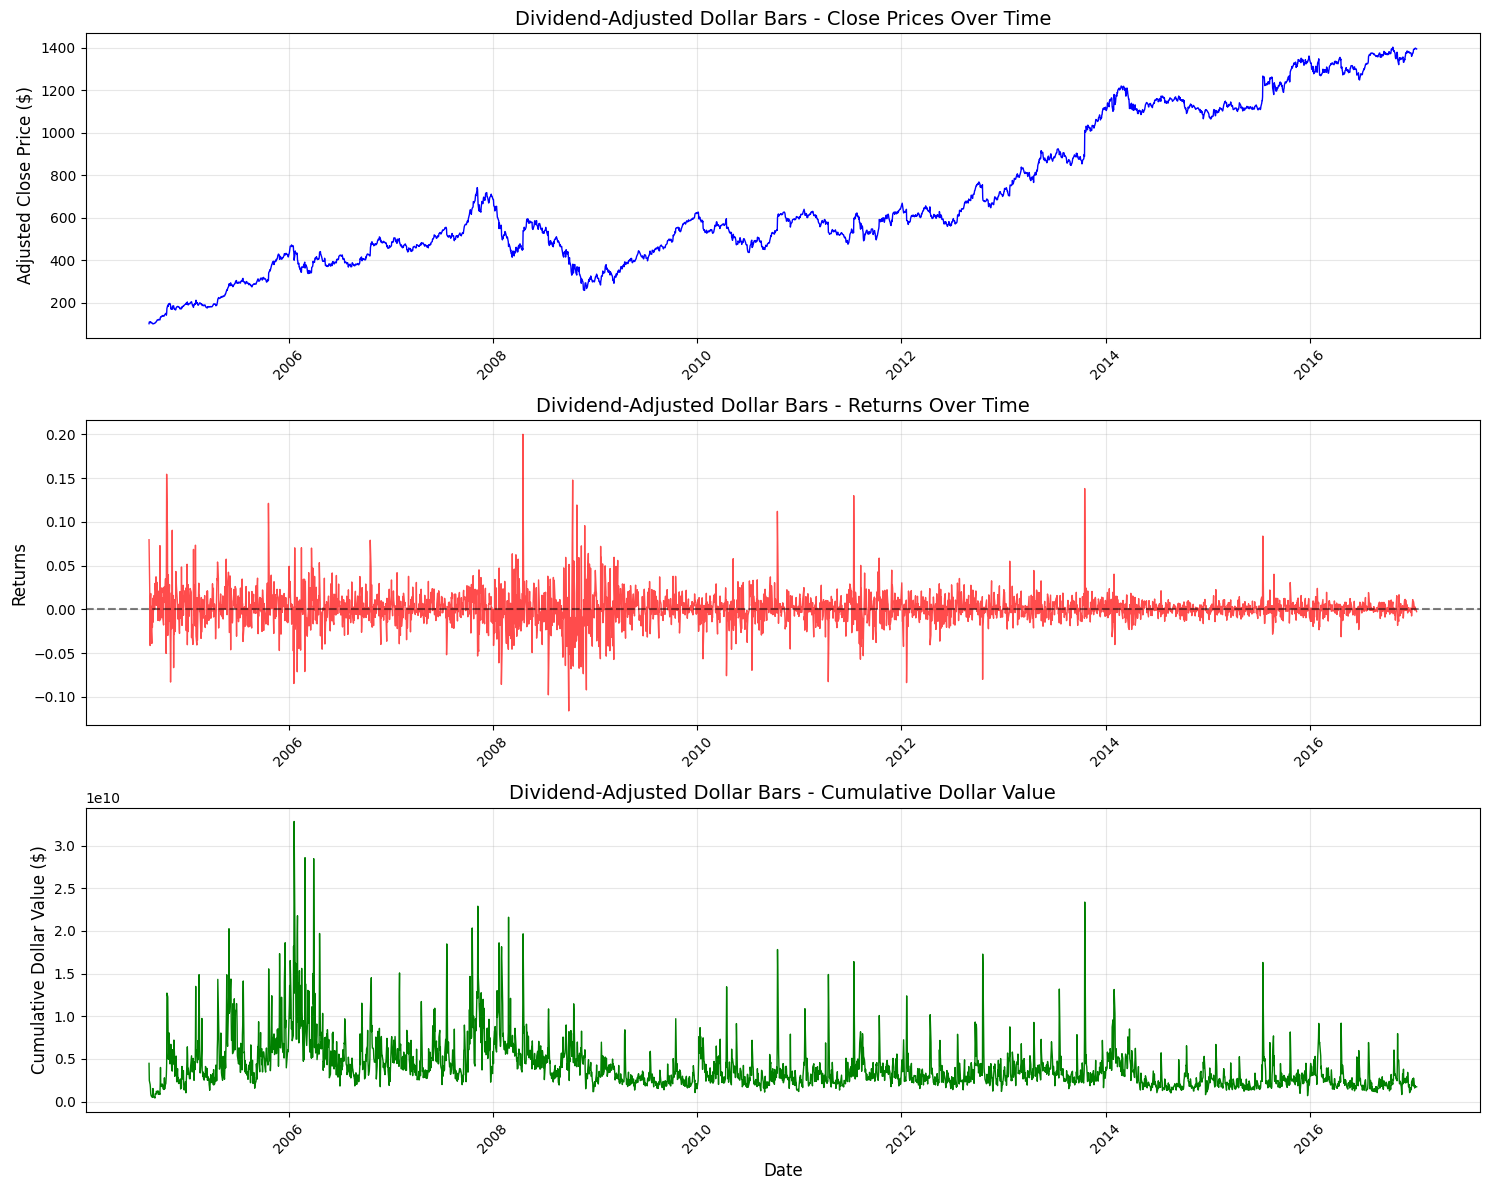

=== DIVIDEND-ADJUSTED DOLLAR BARS STATISTICS ===
Close Price - Min: $100.01, Max: $1403.71, Mean: $687.68
Returns - Min: -0.116091, Max: 0.199915, Mean: 0.001018
Returns Std Dev: 0.018806
Final Cumulative Dollar Value: $1,733,933,301.33
Total Dollar Bars: 3125
Date Range: 2004-08-19 00:00:00 to 2017-01-17 00:00:00

=== COMPARISON WITH ORIGINAL DOLLAR BARS ===
Original vs Adjusted bar count: 3125 vs 3125
Original returns std dev: 0.021663
Adjusted returns std dev: 0.018806
Volatility reduction: 13.19%


In [21]:
# Create three separate charts for dividend-adjusted dollar bars analysis
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Calculate returns for dividend-adjusted dollar bars
dollar_bars_adjusted_returns = dollar_bars_adjusted['close'].pct_change().dropna()

# Plot 1: Dividend-Adjusted Dollar Bars Close Price
axes[0].plot(dollar_bars_adjusted.index, dollar_bars_adjusted['close'], color='blue', linewidth=1)
axes[0].set_title('Dividend-Adjusted Dollar Bars - Close Prices Over Time', fontsize=14)
axes[0].set_ylabel('Adjusted Close Price ($)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Dividend-Adjusted Dollar Bars Returns
axes[1].plot(dollar_bars_adjusted_returns.index, dollar_bars_adjusted_returns, color='red', linewidth=1, alpha=0.7)
axes[1].set_title('Dividend-Adjusted Dollar Bars - Returns Over Time', fontsize=14)
axes[1].set_ylabel('Returns', fontsize=12)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Dividend-Adjusted Cumulative Dollar Value
axes[2].plot(dollar_bars_adjusted.index, dollar_bars_adjusted['cum_dollar_value'], color='green', linewidth=1)
axes[2].set_title('Dividend-Adjusted Dollar Bars - Cumulative Dollar Value', fontsize=14)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Cumulative Dollar Value ($)', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics for dividend-adjusted series
print(f"=== DIVIDEND-ADJUSTED DOLLAR BARS STATISTICS ===")
print(f"Close Price - Min: ${dollar_bars_adjusted['close'].min():.2f}, Max: ${dollar_bars_adjusted['close'].max():.2f}, Mean: ${dollar_bars_adjusted['close'].mean():.2f}")
print(f"Returns - Min: {dollar_bars_adjusted_returns.min():.6f}, Max: {dollar_bars_adjusted_returns.max():.6f}, Mean: {dollar_bars_adjusted_returns.mean():.6f}")
print(f"Returns Std Dev: {dollar_bars_adjusted_returns.std():.6f}")
print(f"Final Cumulative Dollar Value: ${dollar_bars_adjusted['cum_dollar_value'].iloc[-1]:,.2f}")
print(f"Total Dollar Bars: {len(dollar_bars_adjusted)}")
print(f"Date Range: {dollar_bars_adjusted.index.min()} to {dollar_bars_adjusted.index.max()}")

# Compare with original dollar bars
print(f"\n=== COMPARISON WITH ORIGINAL DOLLAR BARS ===")
print(f"Original vs Adjusted bar count: {len(dollar_bars)} vs {len(dollar_bars_adjusted)}")
original_returns = dollar_bars['close'].pct_change().dropna()
print(f"Original returns std dev: {original_returns.std():.6f}")
print(f"Adjusted returns std dev: {dollar_bars_adjusted_returns.std():.6f}")
print(f"Volatility reduction: {((original_returns.std() - dollar_bars_adjusted_returns.std()) / original_returns.std() * 100):.2f}%")